# Drive y librerias

In [9]:
from google.colab import drive
drive.mount('/content/drive') #con este codigo me estoy conectando a tu drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!pip install windrose
from windrose import WindroseAxes #para hacer la roseta de vientos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd #para manejar las tablitas
import numpy as np
import matplotlib.pyplot as plt #para graficar
import seaborn as sns #para graficar
import glob as glb #para archivos

Despues del %cd va la ruta en la cual van a estar todos tus archivos con los que voy a trabajar. Debes descargar previamente los archivos csv y ponerlos en una carpeta drive. Luego pegas esa ruta aqui. Ver más info en el pdf subido.

In [12]:
%cd /content/drive/MyDrive/Meteo_general

/content/drive/MyDrive/Meteo_general


# Estación Von Humboldt febrero

En este caso, yo elegi la estacion von Humboldt. El %cd ya me ubico en mi ruta de trabajo, por lo que para acceder al archivo csv, solo coloco el nombre de mi archivo, el cual depende como tú lo tengas guardado.

In [13]:
#aca en la ruta deben poner su propia ruta
Von_Humboldt_feb = pd.read_csv("Von_Humboldt_feb.csv",skiprows=10) #dejen el skip rows
Von_Humboldt_feb=Von_Humboldt_feb.replace('S/D',np.NaN) #los datos s/d son sin datos
Von_Humboldt_feb.head()

,AÑO / MES / DÍA,HORA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s)
0,2019/02/01,00:00,24.6,0.0,73,263,3.4
1,2019/02/01,01:00,23.5,0.0,81,300,2.7
2,2019/02/01,02:00,23.2,0.0,82,319,3.3
3,2019/02/01,03:00,22.8,0.0,83,325,1.1
4,2019/02/01,04:00,21.9,0.0,87,313,1.8


In [14]:
Von_Humboldt_feb.dtypes #todo me sale tipo objeto, pero esto no es asi, debo hacer correciones

AÑO / MES / DÍA               object
HORA                          object
TEMPERATURA (°C)              object
PRECIPITACIÓN (mm/hora)       object
HUMEDAD (%)                   object
DIRECCION DEL VIENTO (°)      object
VELOCIDAD DEL VIENTO (m/s)    object
dtype: object

El float es como un decimal, le voy aplicar ese formato a casi todas las columnas. En el caso de año/mes/dia pues es una fecha asi que debo darle ese formato

In [15]:
Von_Humboldt_feb["TEMPERATURA (°C)"]=Von_Humboldt_feb["TEMPERATURA (°C)"].astype(float)
Von_Humboldt_feb["PRECIPITACIÓN (mm/hora)"]=Von_Humboldt_feb["PRECIPITACIÓN (mm/hora)"].astype(float)
Von_Humboldt_feb["HUMEDAD (%)"]=Von_Humboldt_feb["HUMEDAD (%)"].astype(float)
Von_Humboldt_feb["DIRECCION DEL VIENTO (°)"]=Von_Humboldt_feb["DIRECCION DEL VIENTO (°)"].astype(float)
Von_Humboldt_feb["VELOCIDAD DEL VIENTO (m/s)"]=Von_Humboldt_feb["VELOCIDAD DEL VIENTO (m/s)"].astype(float)
Von_Humboldt_feb["AÑO / MES / DÍA"] =pd.to_datetime(Von_Humboldt_feb["AÑO / MES / DÍA"], format="%Y/%m/%d")

In [16]:
Von_Humboldt_feb.dtypes #aca se ve como se cambio el formato

AÑO / MES / DÍA               datetime64[ns]
HORA                                  object
TEMPERATURA (°C)                     float64
PRECIPITACIÓN (mm/hora)              float64
HUMEDAD (%)                          float64
DIRECCION DEL VIENTO (°)             float64
VELOCIDAD DEL VIENTO (m/s)           float64
dtype: object

In [17]:
Von_Humboldt_feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AÑO / MES / DÍA             672 non-null    datetime64[ns]
 1   HORA                        672 non-null    object        
 2   TEMPERATURA (°C)            671 non-null    float64       
 3   PRECIPITACIÓN (mm/hora)     671 non-null    float64       
 4   HUMEDAD (%)                 671 non-null    float64       
 5   DIRECCION DEL VIENTO (°)    671 non-null    float64       
 6   VELOCIDAD DEL VIENTO (m/s)  671 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 36.9+ KB


In [18]:
Von_Humboldt_feb.describe() #me da un resumen de mi tablita, de paso veo si hay un valor atipico

,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s)
count,671.000000,671.000000,671.000000,671.000000,671.000000
mean,25.304173,0.002683,68.356185,245.579732,3.646498
std,2.988388,0.032671,14.136534,71.434026,2.650792
min,19.700000,0.000000,32.000000,0.000000,0.000000
25%,22.750000,0.000000,57.000000,240.500000,1.500000
50%,24.800000,0.000000,70.000000,266.000000,2.800000
75%,27.950000,0.000000,82.000000,286.000000,5.700000
max,33.100000,0.600000,90.000000,354.000000,11.300000


In [19]:
Von_Humboldt_feb['dia'] = Von_Humboldt_feb["AÑO / MES / DÍA"].dt.day
#aca le estoy agregando una columna llamada dia
Von_Humboldt_feb.head()

,AÑO / MES / DÍA,HORA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s),dia
0,2019-02-01,00:00,24.6,0.0,73.0,263.0,3.4,1
1,2019-02-01,01:00,23.5,0.0,81.0,300.0,2.7,1
2,2019-02-01,02:00,23.2,0.0,82.0,319.0,3.3,1
3,2019-02-01,03:00,22.8,0.0,83.0,325.0,1.1,1
4,2019-02-01,04:00,21.9,0.0,87.0,313.0,1.8,1


Aca elegi mi dia como el 9 de febrero y la guarde en una nueva variable. Tengan mucho cuidado al momento de trabajar con variables.
Por ejemplo si yo ponia:


```
Von_Humboldt_feb9= tabla[tabla['dia']==9]
```
Esto iba a salir error porque en ningun momento yo he definido la variable tabla



In [20]:
Von_Humboldt_feb9= Von_Humboldt_feb[Von_Humboldt_feb['dia']==9]
#con mi columna dia, le estoy diciendo que solo me seleccione los datos del dia 9
#ustedes pueden cambiar este numero al dia que quieran

Para calcula la presion, se debe seguir la formula que esta en su guia. Es importante que cambien la altura si es que trabajan con otra estación. Caso contrario, tendran mal sus resultados. Si van a trabajar con otra estación le cambian de nombre a la variable. Por ejemplo si trabajan con la estación Huayao en vez de la de Von Humboldt, harian lo siguiente:
Mi caso:
```
altitud_Von_Humboldt = 247
presion_Von_Humboldt = 1014.8*np.exp(-1.17*10**-4*altitud_Von_Humboldt)
```

Ustedes
```
altitud_Huayao = 3321
presion_Huayao = 1014.8*np.exp(-1.17*10**-4*altitud_Huayao)
```



In [21]:
#calcular la presion
altitud_Von_Humboldt = 247
presion_Von_Humboldt = 1014.8*np.exp(-1.17*10**-4*altitud_Von_Humboldt)

Aca estoy creando nuevas columnas de las variables que me van a servir. Si ustedes traban con otra estacion, cambien el nombre de la variable.

Mi caso

```
Von_Humboldt_feb9["es"]= 6.11*(10**(7.5*Von_Humboldt_feb9["TEMPERATURA (°C)"]/(237.5+Von_Humboldt_feb9["TEMPERATURA (°C)"])))

```

Supongamos que ustdes decidieron hacerlo con la estacion Huayao
```
Huayao_feb9["es"]= 6.11*(10**(7.5*Huayao_feb9["TEMPERATURA (°C)"]/(237.5+Huayao_feb9["TEMPERATURA (°C)"])))
```

Sin embargo, esto solo va a funcionar si es que su tablita la guardaron como Huayao_feb9 porque es una variable que ya esta definida.

In [22]:
Von_Humboldt_feb9["es"]= 6.11*(10**(7.5*Von_Humboldt_feb9["TEMPERATURA (°C)"]/(237.5+Von_Humboldt_feb9["TEMPERATURA (°C)"])))
Von_Humboldt_feb9["ea"]= Von_Humboldt_feb9["HUMEDAD (%)"]*Von_Humboldt_feb9["es"]/100
Von_Humboldt_feb9["Deficit"] = Von_Humboldt_feb9["es"]-Von_Humboldt_feb9["ea"]
Von_Humboldt_feb9["Td"]= (237.5*np.log10(Von_Humboldt_feb9["ea"]/6.11) ) / (7.5 - np.log10(Von_Humboldt_feb9["ea"]/6.11))
Von_Humboldt_feb9["Humedad_absoluta"] = 216.5 * Von_Humboldt_feb9["ea"] / (Von_Humboldt_feb9["TEMPERATURA (°C)"]+273.15)
#humedad especifica
Von_Humboldt_feb9["q"]=622*(Von_Humboldt_feb9["ea"]/(presion_Von_Humboldt-0.3786*Von_Humboldt_feb9["ea"]))
Von_Humboldt_feb9["r"]=622*(Von_Humboldt_feb9["ea"]/(presion_Von_Humboldt-Von_Humboldt_feb9["ea"]))

<ipython-input-22-c54b888de7f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Von_Humboldt_feb9["es"]= 6.11*(10**(7.5*Von_Humboldt_feb9["TEMPERATURA (°C)"]/(237.5+Von_Humboldt_feb9["TEMPERATURA (°C)"])))
<ipython-input-22-c54b888de7f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Von_Humboldt_feb9["ea"]= Von_Humboldt_feb9["HUMEDAD (%)"]*Von_Humboldt_feb9["es"]/100
<ipython-input-22-c54b888de7f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [23]:
Von_Humboldt_feb9.head()

,AÑO / MES / DÍA,HORA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s),dia,es,ea,Deficit,Td,Humedad_absoluta,q,r
192,2019-02-09,00:00,22.6,0.0,84.0,339.0,0.8,9,27.397671,23.014044,4.383627,19.755572,16.847136,14.649028,14.866599
193,2019-02-09,01:00,23.1,0.0,80.0,97.0,1.4,9,28.239252,22.591401,5.647850,19.456839,16.509834,14.377651,14.587178
194,2019-02-09,02:00,22.9,0.0,81.0,22.0,1.7,9,27.899950,22.598959,5.300990,19.462224,16.526515,14.382503,14.592172
195,2019-02-09,03:00,21.7,0.0,85.0,336.0,2.4,9,25.937895,22.047211,3.890684,19.064909,16.188642,14.028359,14.227759
196,2019-02-09,04:00,21.7,0.0,86.0,310.0,1.4,9,25.937895,22.306590,3.631305,19.252759,16.379097,14.194824,14.399019


# Automatizando este proceso con las demas tablas

In [24]:
files = sorted(glb.glob("*csv"))
files # acuerdate este orden

['Huaytapallana_ago.csv',
 'Huaytapallana_feb.csv',
 'Malinowsky_feb.csv',
 'Malinowsky_julio.csv',
 'Von_Humboldt_ago.csv',
 'Von_Humboldt_feb.csv']

In [25]:
archivos=[]
for file in files:
   df=pd.read_csv(file, skiprows=10)
   df=df.replace('S/D',np.NaN)
   #cambiando el tipo de columnas
   df["TEMPERATURA (°C)"]=df["TEMPERATURA (°C)"].astype(float)
   df["PRECIPITACIÓN (mm/hora)"]=df["PRECIPITACIÓN (mm/hora)"].astype(float)
   df["HUMEDAD (%)"]=df["HUMEDAD (%)"].astype(float)
   df["DIRECCION DEL VIENTO (°)"]=df["DIRECCION DEL VIENTO (°)"].astype(float)
   df["VELOCIDAD DEL VIENTO (m/s)"]=df["VELOCIDAD DEL VIENTO (m/s)"].astype(float)
   df["AÑO / MES / DÍA"] =pd.to_datetime(df["AÑO / MES / DÍA"], format="%Y/%m/%d")
   #elegiendo el dia
   df['dia'] = df["AÑO / MES / DÍA"].dt.day
   df1= df[df['dia']==9] #eligi el dia 9, pueden cambiarlo
   #variables nuevas
   df1["es"]= 6.11*(10**(7.5*df1["TEMPERATURA (°C)"]/(237.5+df1["TEMPERATURA (°C)"])))
   df1["ea"]= df1["HUMEDAD (%)"]*df1["es"]/100
   df1["Deficit"] = df1["es"]-df1["ea"]
   df1["Td"]= (237.5*np.log10(df1["ea"]/6.11) ) / (7.5 - np.log10(df1["ea"]/6.11))
   df1["Humedad_absoluta"] = 216.5 * df1["ea"] / (df1["TEMPERATURA (°C)"]+273.15)
   archivos.append(df1)

<ipython-input-25-9ed1656e8eaa>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["es"]= 6.11*(10**(7.5*df1["TEMPERATURA (°C)"]/(237.5+df1["TEMPERATURA (°C)"])))
<ipython-input-25-9ed1656e8eaa>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["ea"]= df1["HUMEDAD (%)"]*df1["es"]/100
<ipython-input-25-9ed1656e8eaa>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [26]:
df_Huaytapallana_ago = archivos[0]
df_Huaytapallana_feb = archivos[1]
df_Malinowsky_ago = archivos[2]
df_Malinowsky_feb = archivos[3]
df_Von_Humboldt_ago = archivos[4]
df_Von_Humboldt_feb = archivos[5]

## Calculando las presiones de las 3 estaciones
Debes fijarte la altura de cada estacion que vas a elegir

In [27]:
#Para Von Humboldt
altitud_Von_Humboldt = 247
presion_Von_Humboldt = 1014.8*np.exp(-1.17*10**-4*altitud_Von_Humboldt)
#Para Huaytapallana
altitud_Huaytapallana = 4648
presion_Huaytapallana = 1014.8*np.exp(-1.17*10**-4*altitud_Huaytapallana)
#Para Mallinoswky
altitud_Mallinoswky = 220
presion_Mallinoswky = 1014.8*np.exp(-1.17*10**-4*altitud_Mallinoswky)

In [28]:
#Para Von Humboldt
df_Von_Humboldt_feb["q"]=622*(df_Von_Humboldt_feb["ea"]/(presion_Von_Humboldt-0.3786*df_Von_Humboldt_feb["ea"]))
df_Von_Humboldt_feb["r"]=622*(df_Von_Humboldt_feb["ea"]/(presion_Von_Humboldt-df_Von_Humboldt_feb["ea"]))

df_Von_Humboldt_ago["q"]=622*(df_Von_Humboldt_ago["ea"]/(presion_Von_Humboldt-0.3786*df_Von_Humboldt_ago["ea"]))
df_Von_Humboldt_ago["r"]=622*(df_Von_Humboldt_ago["ea"]/(presion_Von_Humboldt-df_Von_Humboldt_ago["ea"]))

#Para Huaytapallana
df_Huaytapallana_feb["q"]=622*(df_Huaytapallana_feb["ea"]/(presion_Huaytapallana-0.3786*df_Huaytapallana_feb["ea"]))
df_Huaytapallana_feb["r"]=622*(df_Huaytapallana_feb["ea"]/(presion_Huaytapallana-df_Huaytapallana_feb["ea"]))

df_Huaytapallana_ago["q"]=622*(df_Huaytapallana_ago["ea"]/(presion_Huaytapallana-0.3786*df_Huaytapallana_ago["ea"]))
df_Huaytapallana_ago["r"]=622*(df_Huaytapallana_ago["ea"]/(presion_Huaytapallana-df_Huaytapallana_ago["ea"]))

#Para Mallinowsky
df_Malinowsky_feb["q"]=622*(df_Malinowsky_feb["ea"]/(presion_Mallinoswky-0.3786*df_Malinowsky_feb["ea"]))
df_Malinowsky_feb["r"]=622*(df_Malinowsky_feb["ea"]/(presion_Mallinoswky-df_Malinowsky_feb["ea"]))

df_Malinowsky_ago["q"]=622*(df_Malinowsky_ago["ea"]/(presion_Mallinoswky-0.3786*df_Malinowsky_ago["ea"]))
df_Malinowsky_ago["r"]=622*(df_Malinowsky_ago["ea"]/(presion_Mallinoswky-df_Malinowsky_ago["ea"]))

<ipython-input-28-7d62ea9148d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Von_Humboldt_feb["q"]=622*(df_Von_Humboldt_feb["ea"]/(presion_Von_Humboldt-0.3786*df_Von_Humboldt_feb["ea"]))
<ipython-input-28-7d62ea9148d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Von_Humboldt_feb["r"]=622*(df_Von_Humboldt_feb["ea"]/(presion_Von_Humboldt-df_Von_Humboldt_feb["ea"]))


#Graficas de Von Humboldt

In [29]:
df_Von_Humboldt_completo = pd.concat([df_Von_Humboldt_feb,df_Von_Humboldt_ago])
df_Von_Humboldt_completo.tail()

,AÑO / MES / DÍA,HORA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s),dia,es,ea,Deficit,Td,Humedad_absoluta,q,r
211,2019-08-09,19:00,13.9,0.0,87.0,239.0,2.7,9,15.875193,13.811418,2.063775,11.772197,10.416903,8.760087,8.837429
212,2019-08-09,20:00,13.9,0.0,88.0,288.0,1.3,9,15.875193,13.970170,1.905023,11.945460,10.536637,8.861321,8.940469
213,2019-08-09,21:00,14.0,0.0,88.0,270.0,2.8,9,15.978509,14.061088,1.917421,12.043911,10.601516,8.919303,8.999495
214,2019-08-09,22:00,13.8,0.0,89.0,309.0,2.1,9,15.772464,14.037493,1.734971,12.018415,10.591104,8.904256,8.984176
215,2019-08-09,23:00,13.7,0.0,88.0,276.0,1.7,9,15.670319,13.789881,1.880438,11.748557,10.407911,8.746354,8.823453


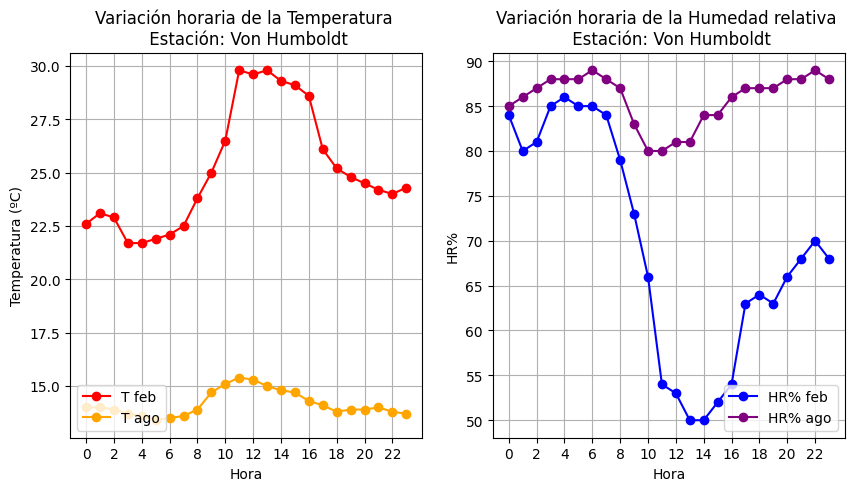

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para temperaturas
ax1.plot(x,df_Von_Humboldt_feb["TEMPERATURA (°C)"],color="red", marker="o",label="T feb")
ax1.plot(x,df_Von_Humboldt_ago["TEMPERATURA (°C)"],color="orange", marker="o",label="T ago")
ax1.set_xlabel("Hora")
ax1.set_ylabel("Temperatura (ºC)")
ax1.set_title("Variación horaria de la Temperatura \n Estación: Von Humboldt")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.grid()
ax1.legend(loc="lower left")

#humedad relativa
ax2=axs[1]
ax2.plot(x, df_Von_Humboldt_feb["HUMEDAD (%)"],color="blue",marker="o",label="HR% feb ")
ax2.plot(x, df_Von_Humboldt_ago["HUMEDAD (%)"],color="purple",marker="o",label="HR% ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("HR%")
ax2.set_xticks(np.arange(0, 24, 2))
ax2.legend(loc="lower right")
ax2.set_title("Variación horaria de la Humedad relativa \n Estación: Von Humboldt")
ax2.grid()
plt.show()

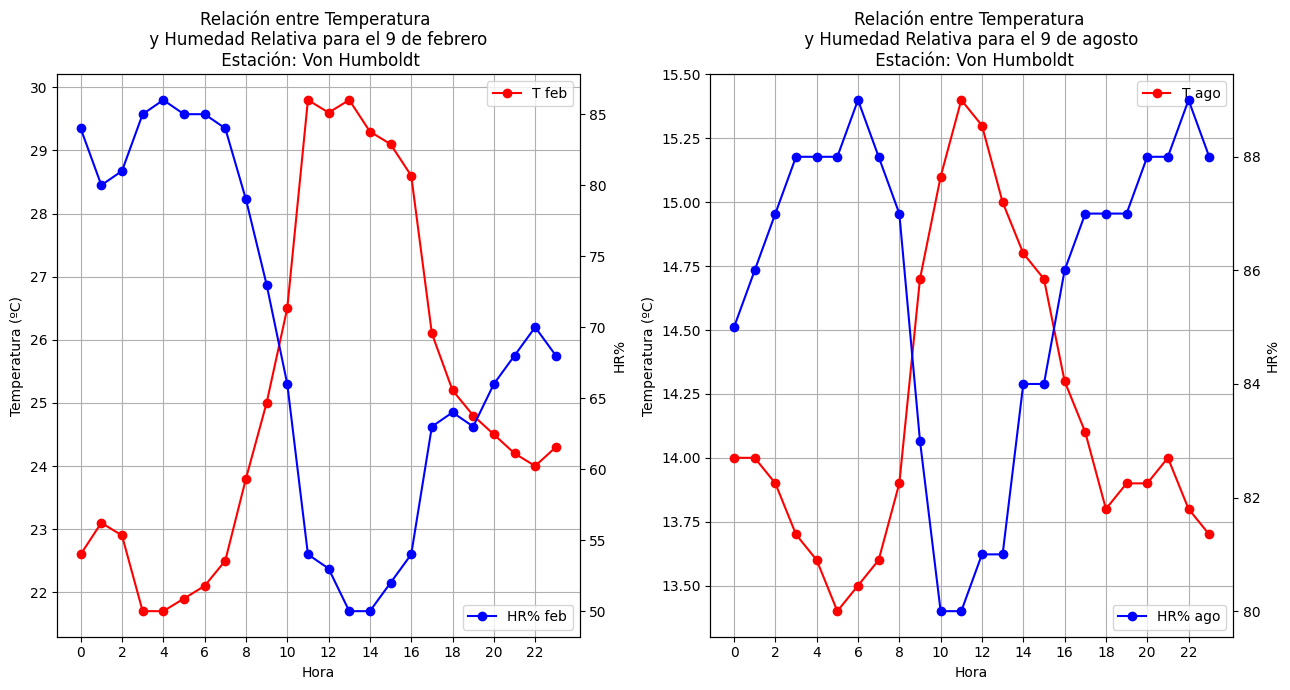

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(13, 7))
x = np.arange(0,24,1)

#FEBRERO
ax=axs[0]
ax.plot(x,df_Von_Humboldt_feb["TEMPERATURA (°C)"],color="red", marker="o",label="T feb")
ax.set_xlabel("Hora")
ax.set_ylabel("Temperatura (ºC)")
ax.set_title("Relación entre Temperatura \n y Humedad Relativa para el 9 de febrero \n Estación: Von Humboldt")
ax.legend(loc="upper right")
ax.grid()
#humedad relativa
ax1=ax.twinx()
ax1.plot(x, df_Von_Humboldt_feb["HUMEDAD (%)"],color="blue",marker="o",label="HR% feb")
ax1.set_ylabel("HR%")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.legend(loc="lower right")

#AGOSTO
ax2=axs[1]
ax2.plot(x,df_Von_Humboldt_ago["TEMPERATURA (°C)"],color="red", marker="o",label="T ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("Temperatura (ºC)")
ax2.set_title("Relación entre Temperatura \n y Humedad Relativa para el 9 de agosto \n Estación: Von Humboldt")
ax2.legend(loc="upper right")
ax2.grid()

ax3=ax2.twinx()
ax3.plot(x, df_Von_Humboldt_ago["HUMEDAD (%)"],color="blue",marker="o",label="HR% ago")
ax3.set_ylabel("HR%")
ax3.set_xticks(np.arange(0, 24, 2))
ax3.legend(loc="lower right")

plt.tight_layout()

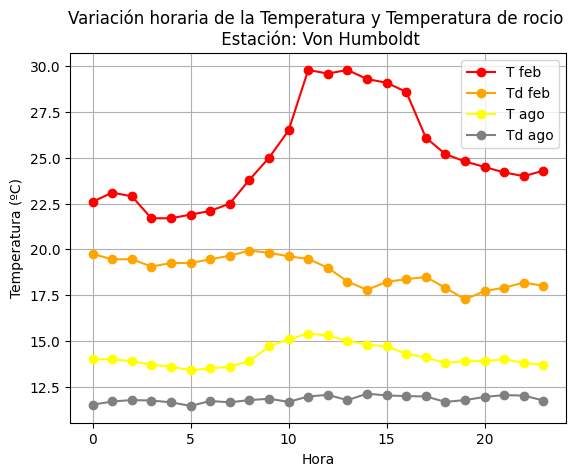

In [32]:
x = np.arange(0,24,1)
plt.plot(x,df_Von_Humboldt_feb["TEMPERATURA (°C)"],color="red", marker="o",label="T feb")
plt.plot(x,df_Von_Humboldt_feb["Td"],color="orange", marker="o",label="Td feb")
plt.plot(x,df_Von_Humboldt_ago["TEMPERATURA (°C)"],color="yellow", marker="o",label="T ago")
plt.plot(x,df_Von_Humboldt_ago["Td"],color="gray", marker="o",label="Td ago")
plt.title("Variación horaria de la Temperatura y Temperatura de rocio \n Estación: Von Humboldt")
plt.legend()
plt.xlabel("Hora")
plt.ylabel("Temperatura (ºC)")
plt.grid()
plt.show()

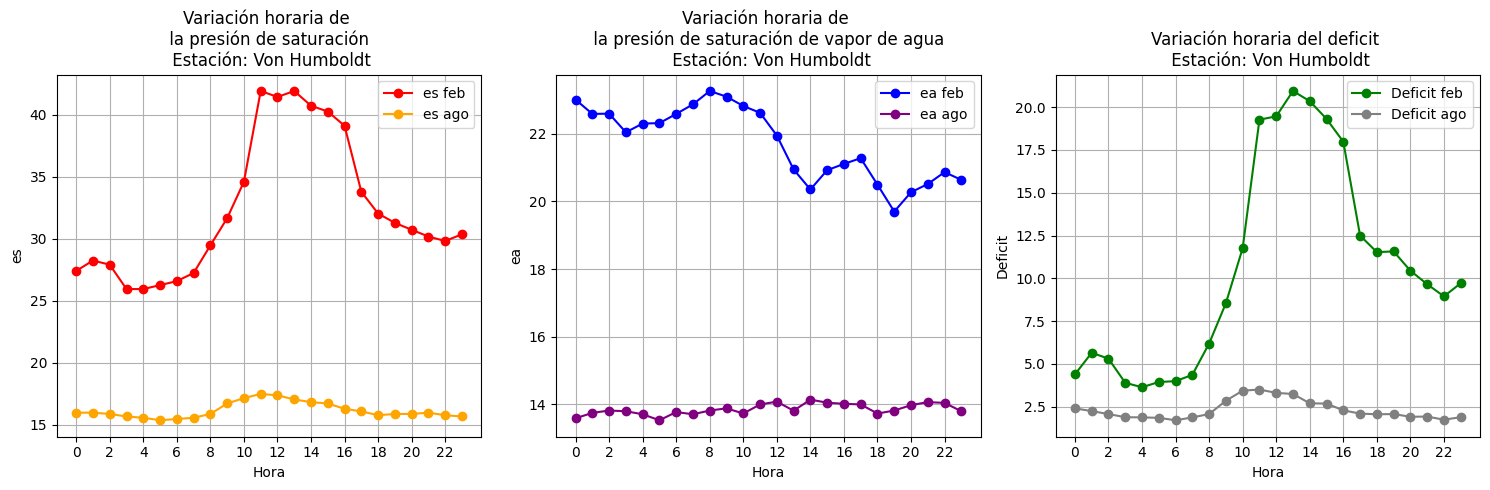

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para es
ax1.plot(x,df_Von_Humboldt_feb["es"],color="red", marker="o",label="es feb")
ax1.plot(x,df_Von_Humboldt_ago["es"],color="orange", marker="o",label="es ago")
ax1.set_xlabel("Hora")
ax1.set_ylabel("es")
ax1.set_title("Variación horaria de \n la presión de saturación \n Estación: Von Humboldt")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.grid()
ax1.legend()
#ea
ax2=axs[1]
ax2.plot(x, df_Von_Humboldt_feb["ea"],color="blue",marker="o",label="ea feb ")
ax2.plot(x, df_Von_Humboldt_ago["ea"],color="purple",marker="o",label="ea ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("ea")
ax2.set_xticks(np.arange(0, 24, 2))
ax2.legend()
ax2.set_title("Variación horaria de \n la presión de saturación de vapor de agua \n Estación: Von Humboldt")
ax2.grid()

#deficit
ax3=axs[2]
ax3.plot(x, df_Von_Humboldt_feb["Deficit"],color="green",marker="o",label="Deficit feb ")
ax3.plot(x, df_Von_Humboldt_ago["Deficit"],color="gray",marker="o",label="Deficit ago")
ax3.set_xlabel("Hora")
ax3.set_ylabel("Deficit")
ax3.set_xticks(np.arange(0, 24, 2))
ax3.legend()
ax3.set_title("Variación horaria del deficit \n Estación: Von Humboldt")
ax3.grid()

plt.tight_layout()

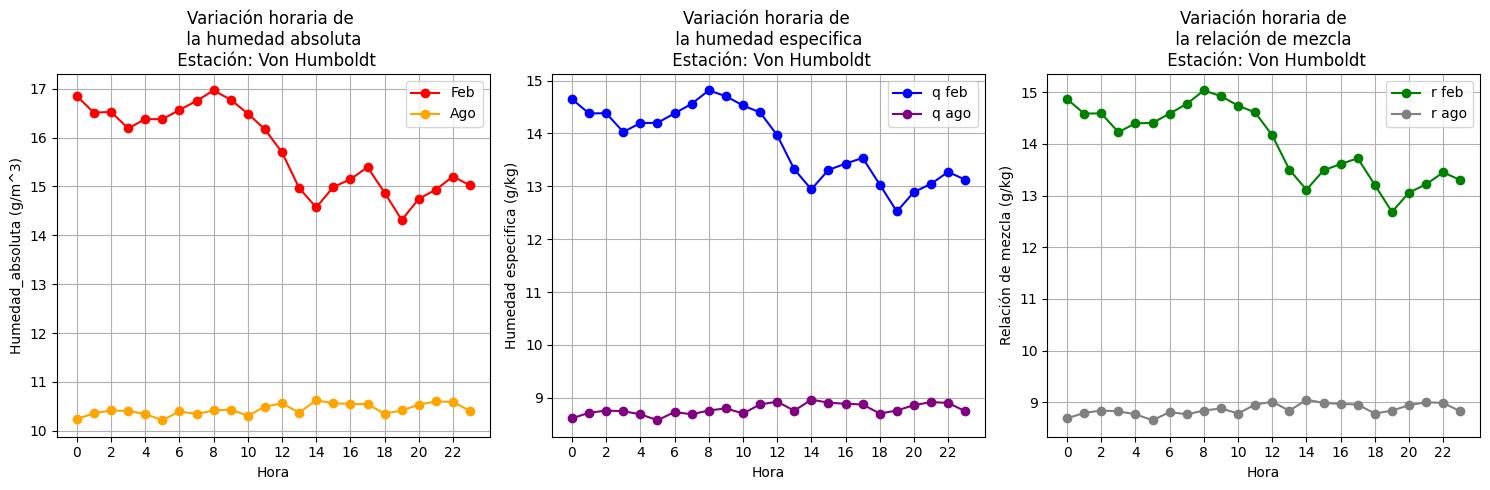

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para es
ax1.plot(x,df_Von_Humboldt_feb["Humedad_absoluta"],color="red", marker="o",label="Feb")
ax1.plot(x,df_Von_Humboldt_ago["Humedad_absoluta"],color="orange", marker="o",label="Ago")
ax1.set_xlabel("Hora")
ax1.set_ylabel("Humedad_absoluta (g/m^3)")
ax1.set_title("Variación horaria de \n la humedad absoluta \n Estación: Von Humboldt")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.grid()
ax1.legend()
#ea
ax2=axs[1]
ax2.plot(x, df_Von_Humboldt_feb["q"],color="blue",marker="o",label="q feb ")
ax2.plot(x, df_Von_Humboldt_ago["q"],color="purple",marker="o",label="q ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("Humedad especifica (g/kg)")
ax2.set_xticks(np.arange(0, 24, 2))
ax2.legend()
ax2.set_title("Variación horaria de \n la humedad especifica \n Estación: Von Humboldt")
ax2.grid()

#deficit
ax3=axs[2]
ax3.plot(x, df_Von_Humboldt_feb["r"],color="green",marker="o",label="r feb ")
ax3.plot(x, df_Von_Humboldt_ago["r"],color="gray",marker="o",label="r ago")
ax3.set_xlabel("Hora")
ax3.set_ylabel("Relación de mezcla (g/kg)")
ax3.set_xticks(np.arange(0, 24, 2))
ax3.legend()
ax3.set_title("Variación horaria de\n la relación de mezcla \n Estación: Von Humboldt")
ax3.grid()

plt.tight_layout()

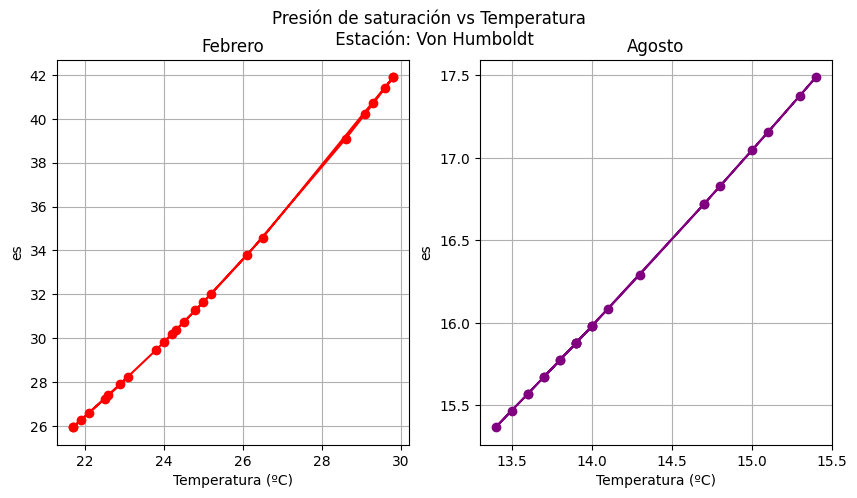

<Figure size 640x480 with 0 Axes>

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para febrero
ax1.plot(df_Von_Humboldt_feb["TEMPERATURA (°C)"],df_Von_Humboldt_feb["es"],color="red", marker="o")
ax1.set_xlabel("Temperatura (ºC)")
ax1.set_ylabel("es")
ax1.grid()
ax1.set_title("Febrero")

#Agosto
ax2=axs[1]
ax2.plot(df_Von_Humboldt_ago["TEMPERATURA (°C)"],df_Von_Humboldt_ago["es"],color="purple",marker="o")
ax2.set_xlabel("Temperatura (ºC)")
ax2.set_ylabel("es")
ax2.set_title("Agosto")
ax2.grid()
plt.suptitle("Presión de saturación vs Temperatura \n Estación: Von Humboldt")
plt.show()
plt.tight_layout()

In [36]:
wd_Von_Humboldt_feb = df_Von_Humboldt_feb['DIRECCION DEL VIENTO (°)']
ws_Von_Humboldt_feb= df_Von_Humboldt_feb['VELOCIDAD DEL VIENTO (m/s)']

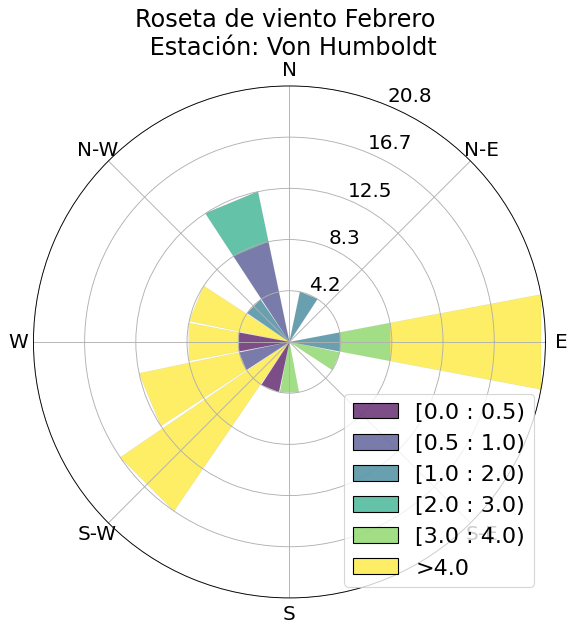

In [37]:
plt.rcParams.update({'font.size': 18})

ax = WindroseAxes.from_ax()
ax.bar(wd_Von_Humboldt_feb, ws_Von_Humboldt_feb, normed=True, opening=0.95, alpha=0.7, edgecolor='gray', lw=0.1, bins=np.array([0,0.5,1,2,3,4])) #, bins=np.arange(0, 31, 5), nsector= 36
#ax.set_legend(fontsize=24, loc='lower right')
plt.title("Roseta de viento Febrero \n Estación: Von Humboldt")
plt.legend(fontsize=20, loc='lower right')

In [38]:
wd_Von_Humboldt_ago = df_Von_Humboldt_ago['DIRECCION DEL VIENTO (°)']
ws_Von_Humboldt_ago= df_Von_Humboldt_ago['VELOCIDAD DEL VIENTO (m/s)']

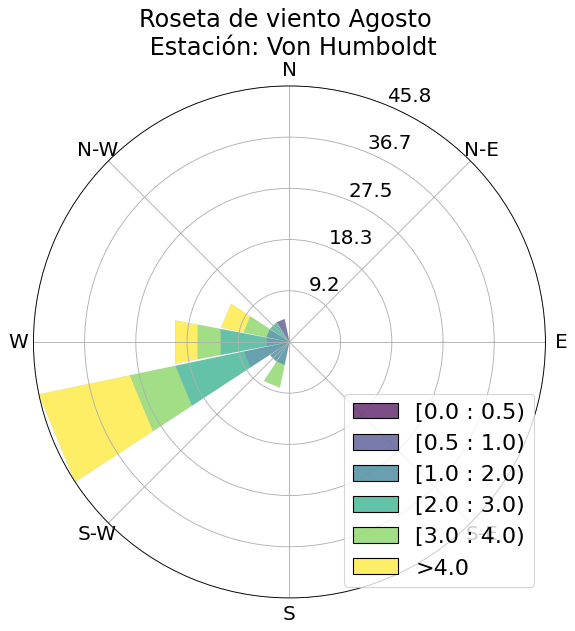

In [39]:
plt.rcParams.update({'font.size': 18})

ax = WindroseAxes.from_ax()
ax.bar(wd_Von_Humboldt_ago, ws_Von_Humboldt_ago, normed=True, opening=0.95, alpha=0.7, edgecolor='gray', lw=0.1, bins=np.array([0,0.5,1,2,3,4])) #, bins=np.arange(0, 31, 5), nsector= 36
#ax.set_legend(fontsize=24, loc='lower right')
plt.title("Roseta de viento Agosto \n Estación: Von Humboldt")
plt.legend(fontsize=20, loc='lower right')

# Exportar tablas

In [40]:
df_Von_Humboldt_ago.columns

Index(['AÑO / MES / DÍA', 'HORA', 'TEMPERATURA (°C)',
       'PRECIPITACIÓN (mm/hora)', 'HUMEDAD (%)', 'DIRECCION DEL VIENTO (°)',
       'VELOCIDAD DEL VIENTO (m/s)', 'dia', 'es', 'ea', 'Deficit', 'Td',
       'Humedad_absoluta', 'q', 'r'],
      dtype='object')

In [41]:
columnas_presentables =  ['HORA','TEMPERATURA (°C)','Td','HUMEDAD (%)','es',
                          'ea', 'Deficit','Humedad_absoluta', 'q', 'r']

In [44]:
exportar_9_feb = df_Von_Humboldt_feb[columnas_presentables]
##exportar_9_feb.to_csv("Exportar_Von_Humboldt_9feb.csv")

In [45]:
exportar_9_ago = df_Von_Humboldt_ago[columnas_presentables]
##exportar_9_ago.to_csv("Exportar_Von_Humboldt_9ago.csv")